In [224]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
df = pd.read_csv('bank_loan_dataset.csv', encoding='latin-1', low_memory=False)

# EDA

In [226]:
df.head(1)

,AsOfDate,Program,BorrName,BorrStreet,BorrCity,BorrState,BorrZip,BankName,BankFDICNumber,BankNCUANumber,...,CongressionalDistrict,BusinessType,BusinessAge,LoanStatus,PaidInFullDate,ChargeOffDate,GrossChargeOffAmount,RevolverStatus,JobsSupported,SoldSecMrktInd
0,20231231,7A,Allen Foot and Ankle Medicine,2919 S ELLSWORTH RD STE 124,MESA,AZ,85212,Western Alliance Bank,57512.0,NaN,...,4,CORPORATION,Existing or more than 2 years old,PIF,12/31/2022,NaN,0,0,0,N


In [227]:
df.columns

Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'BankName', 'BankFDICNumber', 'BankNCUANumber',
       'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval',
       'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear',
       'FirstDisbursementDate', 'DeliveryMethod', 'Subprogram',
       'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount',
       'RevolverStatus', 'JobsSupported', 'SoldSecMrktInd'],
      dtype='object')

In [228]:
df.shape

(57186, 41)

In [229]:
df.dtypes

AsOfDate                        int64
Program                        object
BorrName                       object
BorrStreet                     object
BorrCity                       object
BorrState                      object
BorrZip                         int64
BankName                       object
BankFDICNumber                float64
BankNCUANumber                float64
BankStreet                     object
BankCity                       object
BankState                      object
BankZip                         int64
GrossApproval                   int64
SBAGuaranteedApproval         float64
ApprovalDate                   object
ApprovalFiscalYear              int64
FirstDisbursementDate          object
DeliveryMethod                 object
Subprogram                     object
InitialInterestRate           float64
FixedOrVariableInterestInd     object
TermInMonths                    int64
NaicsCode                       int64
NaicsDescription               object
FranchiseCod

In [230]:
df.describe()

,AsOfDate,BorrZip,BankFDICNumber,BankNCUANumber,BankZip,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,NaicsCode,CongressionalDistrict,GrossChargeOffAmount,RevolverStatus,JobsSupported
count,57186.0,57186.000000,52714.000000,1820.000000,57186.000000,5.718600e+04,5.718600e+04,57186.000000,57186.000000,57186.000000,57186.000000,57186.000000,5.718600e+04,57186.000000,57186.000000
mean,20231231.0,51959.611513,19261.320560,47183.042857,46103.354422,4.051247e+05,3.019969e+05,2019.161386,6.988216,118.739219,515632.821792,9.319694,9.755334e+03,0.293026,10.503200
std,0.0,30338.146642,18347.092622,23364.763149,26518.216434,7.572493e+05,5.898010e+05,1.283477,1.703629,75.811272,177548.564910,10.624905,6.558275e+04,0.455154,19.700308
min,20231231.0,601.000000,51.000000,159.000000,909.000000,1.600000e+03,8.000000e+02,2018.000000,0.000000,0.000000,111110.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,20231231.0,28607.000000,6548.000000,24692.000000,28202.000000,5.000000e+04,2.500000e+04,2018.000000,5.950000,67.000000,424130.000000,2.000000,0.000000e+00,0.000000,2.000000
50%,20231231.0,49331.000000,12517.000000,62514.000000,43240.000000,1.250000e+05,8.500000e+04,2019.000000,6.750000,120.000000,531120.000000,6.000000,0.000000e+00,0.000000,4.000000
75%,20231231.0,80207.000000,28905.000000,67390.000000,60606.000000,3.500000e+05,2.625000e+05,2020.000000,7.750000,120.000000,624410.000000,11.000000,0.000000e+00,1.000000,11.000000
max,20231231.0,99901.000000,91005.000000,97069.000000,99503.000000,5.000000e+06,4.500000e+06,2024.000000,15.000000,324.000000,926150.000000,53.000000,4.491269e+06,1.000000,400.000000


# Duplicate value treatment

In [231]:
df = df.drop_duplicates(keep = False)

In [232]:
df.shape

(57099, 41)

In [233]:
df.isnull().sum()

AsOfDate                          0
Program                           0
BorrName                          1
BorrStreet                        0
BorrCity                          0
BorrState                         0
BorrZip                           0
BankName                          0
BankFDICNumber                 4472
BankNCUANumber                55279
BankStreet                        0
BankCity                          0
BankState                         0
BankZip                           0
GrossApproval                     0
SBAGuaranteedApproval             0
ApprovalDate                      0
ApprovalFiscalYear                0
FirstDisbursementDate           170
DeliveryMethod                    0
Subprogram                        0
InitialInterestRate               0
FixedOrVariableInterestInd        0
TermInMonths                      0
NaicsCode                         0
NaicsDescription                366
FranchiseCode                 50329
FranchiseName               

# Visualizing States with Most Jobs Lost and Most Loan Projects

In [234]:
df.dropna(subset = ['JobsSupported'], inplace = True)
df = df[df['JobsSupported'] != 'Y']
df['JobsSupported'] = df['JobsSupported'].astype(int)

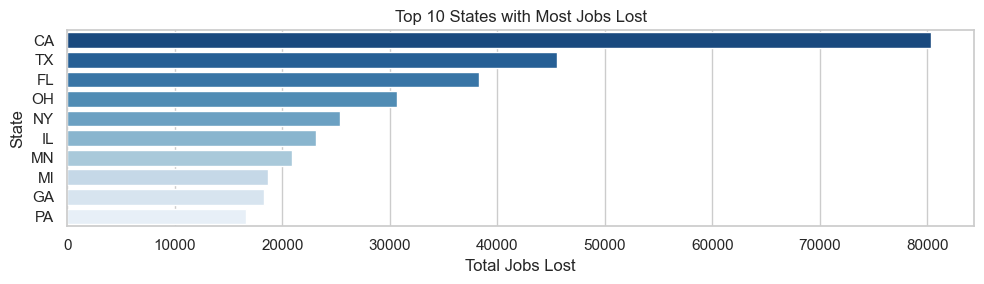

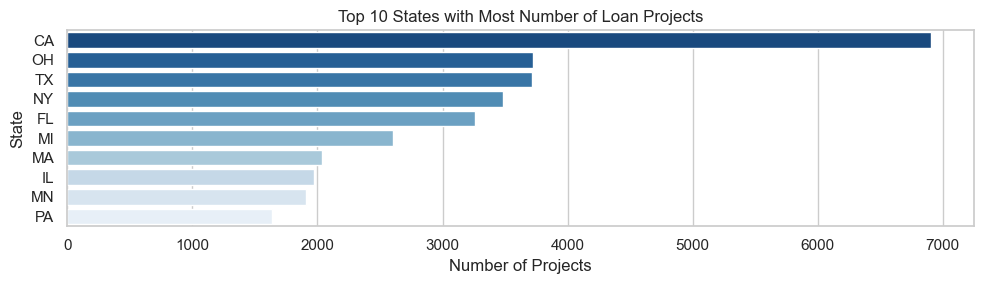

<Figure size 640x480 with 0 Axes>

In [235]:
jobs_lost_by_state = df.groupby('ProjectState')['JobsSupported'].sum().reset_index()

# Sort states based on total jobs supported
jobs_lost_by_state = jobs_lost_by_state.sort_values(by = 'JobsSupported', ascending=False)

# Plotting with seaborn
plt.figure(figsize = (10,3))
sns.barplot(x = 'JobsSupported', y = 'ProjectState', data = jobs_lost_by_state.head(10),hue='ProjectState', palette='Blues_r', legend = False)
plt.title('Top 10 States with Most Jobs Lost')
plt.xlabel('Total Jobs Lost')
plt.ylabel('State')
plt.tight_layout()

projects_by_state = df['ProjectState'].value_counts().reset_index()
projects_by_state.columns = ['ProjectState', 'Number of Projects']

# Sort states based on the number of projects
projects_by_state = projects_by_state.sort_values(by = 'Number of Projects', ascending = False)

# Plotting with seaborn
plt.figure(figsize = (10,3))
sns.barplot(x = 'Number of Projects', y = 'ProjectState', data = projects_by_state.head(10), hue='ProjectState', palette = 'Blues_r', legend=False)
plt.title('Top 10 States with Most Number of Loan Projects')
plt.xlabel('Number of Projects')
plt.ylabel('State')
plt.tight_layout()
plt.show()
plt.savefig('EDA.png')

# Core Data Selection

## Discovering New Features

In [236]:
df['LoanStatus'] = df['LoanStatus'].map({'PIF': 0, 'CHGOFF': 1})

### No. of tota loans in a bank, total defaults, and percentage of default for each bank

In [237]:
bank_defaults = pd.merge(pd.DataFrame(df.groupby('BankName')['LoanStatus'].count()).reset_index()
                         .rename(columns = {'LoanStatus': 'TotalLoanCounts'}),
                                            pd.DataFrame(df.groupby('BankName')['LoanStatus'].sum()).reset_index()
                                            .rename(columns = {'LoanStatus': 'TotalDefaultCounts'}),
                                                               how = 'inner', on = 'BankName')
df = pd.merge(df, bank_defaults, how = 'inner', on = 'BankName')
df['TotalPctDefault'] = df['TotalDefaultCounts']/df['TotalLoanCounts']

### Total Yearly Loan and default count for each back and fiscal year

In [238]:
bank_yearly_defaults = pd.merge(pd.DataFrame(df.groupby(['BankName', 'ApprovalFiscalYear'])['LoanStatus'].count()).reset_index()
                                .rename(columns = {'LoanStatus': 'YearlyLoanCounts'}),
                                pd.DataFrame(df.groupby(['BankName', 'ApprovalFiscalYear'])['LoanStatus'].sum())
                                .reset_index().rename(columns = {'LoanStatus': 'YearlyDefaultCounts'}), how = 'inner', on = ['BankName', 'ApprovalFiscalYear'])

bank_yearly_defaults = bank_yearly_defaults.sort_values(['BankName', 'ApprovalFiscalYear'])

### CummulativeDefault andCummulativeLoansIssued for each back and fiscal year

In [239]:
bank_yearly_defaults['CummulativeDefault'] = bank_yearly_defaults.groupby(['BankName'])['YearlyDefaultCounts'].transform(pd.Series.cumsum)
bank_yearly_defaults['CummulativeLoansIssued'] = bank_yearly_defaults.groupby(['BankName'])['YearlyLoanCounts'].transform(pd.Series.cumsum)

df = pd.merge(df, bank_yearly_defaults, how = 'inner', on = ['BankName', 'ApprovalFiscalYear'])

### Same_place reveals whether the bank and borrower are from same state or not

In [240]:
df['Same_place'] = (df['BankState'] == df['BorrState']).astype(float)

In [241]:
df.columns

Index(['AsOfDate', 'Program', 'BorrName', 'BorrStreet', 'BorrCity',
       'BorrState', 'BorrZip', 'BankName', 'BankFDICNumber', 'BankNCUANumber',
       'BankStreet', 'BankCity', 'BankState', 'BankZip', 'GrossApproval',
       'SBAGuaranteedApproval', 'ApprovalDate', 'ApprovalFiscalYear',
       'FirstDisbursementDate', 'DeliveryMethod', 'Subprogram',
       'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths',
       'NaicsCode', 'NaicsDescription', 'FranchiseCode', 'FranchiseName',
       'ProjectCounty', 'ProjectState', 'SBADistrictOffice',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'PaidInFullDate', 'ChargeOffDate', 'GrossChargeOffAmount',
       'RevolverStatus', 'JobsSupported', 'SoldSecMrktInd', 'TotalLoanCounts',
       'TotalDefaultCounts', 'TotalPctDefault', 'YearlyLoanCounts',
       'YearlyDefaultCounts', 'CummulativeDefault', 'CummulativeLoansIssued',
       'Same_place'],
      dtype='object')

#### Features Discovered = TotalLoanCounts, TotalDefaultCounts, YearlyLoanCounts, YearlyDefaultCounts, CummulativeDefault, CummulativeLoanIssued, Same_place.

In [242]:
columns_to_drop = ['AsOfDate', 'Program', 'BorrName', 'BorrStreet',         'BorrCity','BorrZip', 'BankFDICNumber', 'BankNCUANumber', 'NaicsDescription',
                   'FirstDisbursementDate', 'FranchiseCode',             'FranchiseName','PaidInFullDate', 'ChargeOffDate', 'ProjectCounty', 'NaicsCode',
                   'RevolverStatus', 'GrossChargeOffAmount',              'BankStreet','BankCity', 'BankZip', 'ApprovalDate', 'BankState', 'BorrState', 
                   'SBADistrictOffice', 'ProjectState']

In [243]:
# Core will be our dataset to do further visualization and modelling 
core = df.drop(columns_to_drop, axis = 1)

In [244]:
core.shape

(57099, 23)

# Null Value Treatment

In [245]:
core.isnull().sum()

BankName                          0
GrossApproval                     0
SBAGuaranteedApproval             0
ApprovalFiscalYear                0
DeliveryMethod                    0
Subprogram                        0
InitialInterestRate               0
FixedOrVariableInterestInd        0
TermInMonths                      0
CongressionalDistrict             0
BusinessType                      0
BusinessAge                       0
LoanStatus                        0
JobsSupported                     0
SoldSecMrktInd                10248
TotalLoanCounts                   0
TotalDefaultCounts                0
TotalPctDefault                   0
YearlyLoanCounts                  0
YearlyDefaultCounts               0
CummulativeDefault                0
CummulativeLoansIssued            0
Same_place                        0
dtype: int64

# Deleting rows with null values in the following columns

In [246]:
core.dropna(subset = ['SoldSecMrktInd'], inplace = True)

In [247]:
df['CongressionalDistrict'] = df['CongressionalDistrict'].astype(np.float64)

In [248]:
core.corr(numeric_only = True).LoanStatus

GrossApproval            -0.100696
SBAGuaranteedApproval    -0.097407
ApprovalFiscalYear       -0.058867
InitialInterestRate       0.173754
TermInMonths             -0.191438
CongressionalDistrict     0.044643
LoanStatus                1.000000
JobsSupported            -0.055018
TotalLoanCounts           0.017347
TotalDefaultCounts        0.218805
TotalPctDefault           0.383459
YearlyLoanCounts          0.025643
YearlyDefaultCounts       0.211319
CummulativeDefault        0.227876
CummulativeLoansIssued    0.022449
Same_place               -0.109349
Name: LoanStatus, dtype: float64

# Outlier Detection and Treatment

### Outlier Detection using IQR

In [249]:
#sns.set_style("whitegrid")

# create the boxplot using seaborn
#plt.figure(figsize = (6, 2.5))
#ax = sns.boxplot(data = core[['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths', 'InitialInterestRate']], palette = 'Blues_d', whis = 3.5)

# rotate xlabels
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
#plt.title('Boxplot of Numerical Columns')
#plt.xlabel('Columns')
#plt.ylabel('Values')
#plt.show()

### Outlier Treatment using Trimming 

In [250]:
#columns_of_interest = ['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths']

#Iterate three times for each column
#for _ in range(10):
 #   for column in columns_of_interest:
        #Calculate quartiles and IQR
  #      Q1 = core[column].quantile(0.25)
   #     Q3 = core[column].quantile(0.75)
   #     IQR = Q3-Q1
        #Calculate lower and upper bounds
    #    lower = Q1 - 3.5*IQR
    #    upper = Q1 + 3.5*IQR
        #filter outliers
     #   core = core.loc[(core[column] >= lower) & (core[column] <= upper)]

### Boxplot after Outlier Treatment

In [251]:
#sns.set_style("whitegrid")

# create the boxplot using seaborn
#plt.figure(figsize = (6, 2.5))
#ax = sns.boxplot(data = core[['GrossApproval', 'SBAGuaranteedApproval', 'TermInMonths', 'InitialInterestRate']], palette = 'Blues_d', whis = 3.5)

# rotate xlabels
#ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha = 'right')
#plt.title('Boxplot of Numerical Columns')
#plt.xlabel('Columns')
#plt.ylabel('Values')
#plt.show()

## Skewness in dataset

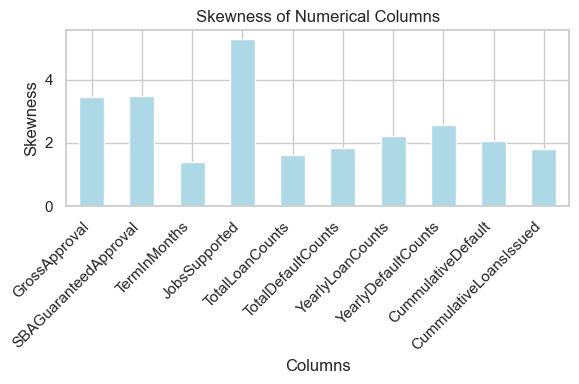

In [252]:
selected_columns = ['GrossApproval','SBAGuaranteedApproval','TermInMonths','JobsSupported','TotalLoanCounts',
                    'TotalDefaultCounts','YearlyLoanCounts','YearlyDefaultCounts','CummulativeDefault','CummulativeLoansIssued']

# Select numeric columns from the provided list
numeric_columns = core[selected_columns]


# Calculate skewness for each numeric column
skewness = numeric_columns.apply(lambda x: x.skew())

# Plotting
plt.figure(figsize=(6, 4))
skewness.plot(kind='bar', color='lightblue')
plt.title('Skewness of Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot before showing it
plt.savefig('skew_before.png')

# Show the plot
plt.show()

In [253]:
core.columns

Index(['BankName', 'GrossApproval', 'SBAGuaranteedApproval',
       'ApprovalFiscalYear', 'DeliveryMethod', 'Subprogram',
       'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'LoanStatus',
       'JobsSupported', 'SoldSecMrktInd', 'TotalLoanCounts',
       'TotalDefaultCounts', 'TotalPctDefault', 'YearlyLoanCounts',
       'YearlyDefaultCounts', 'CummulativeDefault', 'CummulativeLoansIssued',
       'Same_place'],
      dtype='object')

### Treating skewness using log transformation

In [254]:
# # List of columns you want to consider
# selected_columns = ['GrossApproval','SBAGuaranteedApproval','TermInMonths','JobsSupported','TotalLoanCounts',
#                     'TotalDefaultCounts','YearlyLoanCounts','YearlyDefaultCounts','CummulativeDefault','CummulativeLoansIssued']

# # Select numeric columns from the provided list
# numeric_columns_selected = core[selected_columns]

# # Calculate skewness for each numeric column
# skewness = numeric_columns_selected.apply(lambda x: x.skew())

# #Filter columns with skewness greater than 1
# high_skew_columns = skewness[skewness > 1].index

# # Apply log transformation to high skewness columns
# for column in high_skew_columns:
#     core[column] = np.log1p(core[column]) # using np.log1p to avoid issues with zero or negative values

# # Plotting skewness after transformation for selected columns
# skewness_after = core[high_skew_columns].apply(lambda x: x.skew())

# # Removing 'TotalPctDefault' from the high skew columns
# if 'TotalPctDefault' in high_skew_columns:
#     high_skew_columns = high_skew_columns.drop('TotalPctDefault')

# plt.figure(figsize = (6, 4))
# skewness_after.plot(kind = 'bar', color = 'lightblue')
# plt.title('Skewness of Selected Numerical Columns after Log Transformation')
# plt.xlabel('Columns')
# plt.ylabel('Skewness')
# plt.xticks(rotation = 45, ha = 'right')
# plt.tight_layout()
# plt.savefig('skew_after.png')
# plt.show()

# Categorical to Numerical

In [255]:
# Importing LabelEncoder for tranforming categorical to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [256]:
core['SoldSecMrktInd'] = label_encoder.fit_transform(core['SoldSecMrktInd'])
core['DeliveryMethod'] = label_encoder.fit_transform(core['DeliveryMethod'])
core['FixedOrVariableInterestInd'] = label_encoder.fit_transform(core['FixedOrVariableInterestInd'])

In [257]:
core['LoanStatus'].value_counts()

LoanStatus
0    42750
1     4101
Name: count, dtype: int64

# Data Visualization

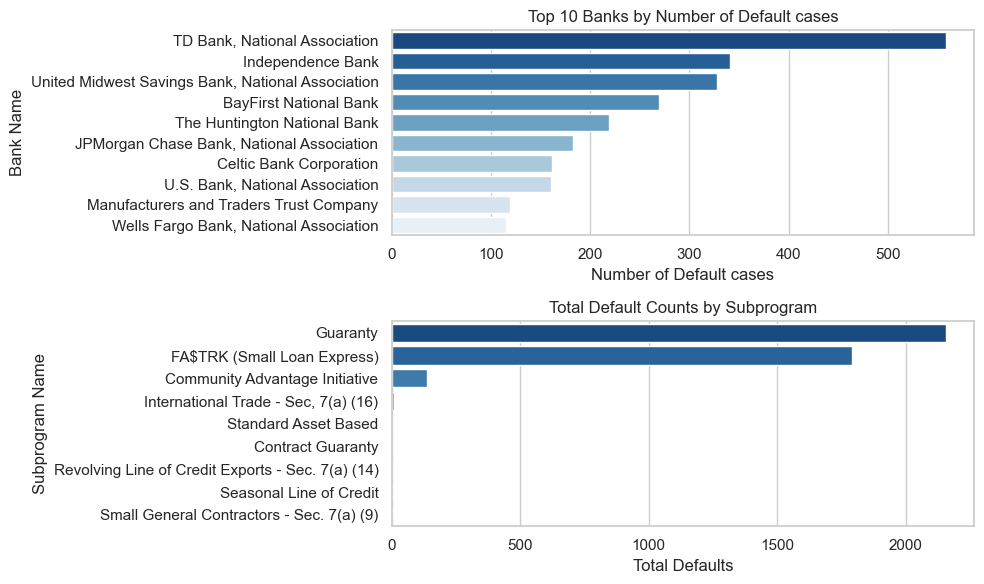

In [258]:
# Group by BankName and count the number of default cases
defaulter_counts_banks = core[core['LoanStatus'] == 1].groupby('BankName').size().sort_values(ascending=False).reset_index(name='Number of Default cases')
                                                                                                                       
# Take the top 10 banks
top_10_banks = defaulter_counts_banks.head(10)

# Group by 'Subprogram' and sum the 'LoanStatus' column to get total default counts
defaulter_counts_subprogram = core.groupby('Subprogram')['LoanStatus'].sum().reset_index(name='Total Defaults')

# Sort the DataFrame by 'Total Defaults' in descending order
defaulter_counts_subprogram = defaulter_counts_subprogram.sort_values(by='Total Defaults', ascending=False)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# Plotting for top 10 banks
sns.barplot(ax=axes[0], x='Number of Default cases', y='BankName', hue='BankName', data=top_10_banks, palette='Blues_r')
axes[0].set_title('Top 10 Banks by Number of Default cases')
axes[0].set_xlabel('Number of Default cases')
axes[0].set_ylabel('Bank Name')

# Plotting for subprograms
sns.barplot(ax=axes[1], x='Total Defaults', y='Subprogram', data=defaulter_counts_subprogram, hue='Subprogram', palette='Blues_r')
axes[1].set_title('Total Default Counts by Subprogram')
axes[1].set_xlabel('Total Defaults')
axes[1].set_ylabel('Subprogram Name')

# Adjust layout
plt.tight_layout()

# Save the combined plot
plt.savefig('combined_plot.png')

# Show the combined plot
plt.show()

In [259]:
core['BankName'] = label_encoder.fit_transform(core['BankName'])
core['BusinessType'] = label_encoder.fit_transform(core['BusinessType'])
core['BusinessAge'] = label_encoder.fit_transform(core['FixedOrVariableInterestInd'])
core['Subprogram'] = label_encoder.fit_transform(core['Subprogram'])

### Reordering the dataset with the target column ('LoanStatus') at the end

In [260]:
column_index = core.columns.get_loc('LoanStatus')

# Reorder the columns, putting the selected column at the end
columns = list(core.columns)
columns.append(columns.pop(column_index))

# Create a new DataFrame with columns reordered
core = core[columns]

### Visualizing the correlation of all columns with target column

In [261]:
corr_mat = core.corr(numeric_only = True).LoanStatus

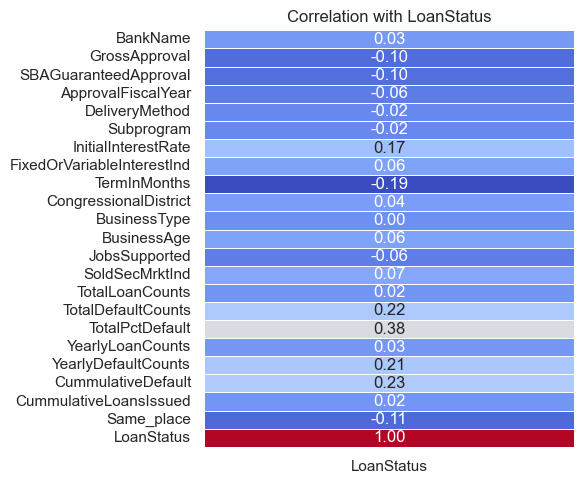

In [262]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr_mat.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidth=.5, cbar=False)
plt.title(f'Correlation with {"LoanStatus"}')
plt.ylabel('')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('correlation.png')  # Save the figure before displaying it
plt.show()

# Feature Selection

In [263]:
core.columns

Index(['BankName', 'GrossApproval', 'SBAGuaranteedApproval',
       'ApprovalFiscalYear', 'DeliveryMethod', 'Subprogram',
       'InitialInterestRate', 'FixedOrVariableInterestInd', 'TermInMonths',
       'CongressionalDistrict', 'BusinessType', 'BusinessAge', 'JobsSupported',
       'SoldSecMrktInd', 'TotalLoanCounts', 'TotalDefaultCounts',
       'TotalPctDefault', 'YearlyLoanCounts', 'YearlyDefaultCounts',
       'CummulativeDefault', 'CummulativeLoansIssued', 'Same_place',
       'LoanStatus'],
      dtype='object')

In [264]:
X = core.iloc[:, [2,6,7,8,11,13,16,18]].values

In [265]:
Y = core.iloc[:, -1]

In [266]:
X.shape, Y.shape

((46851, 8), (46851,))

In [267]:
Y.value_counts()

LoanStatus
0    42750
1     4101
Name: count, dtype: int64

# Train Test Split

In [268]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

### Visualizing train test split

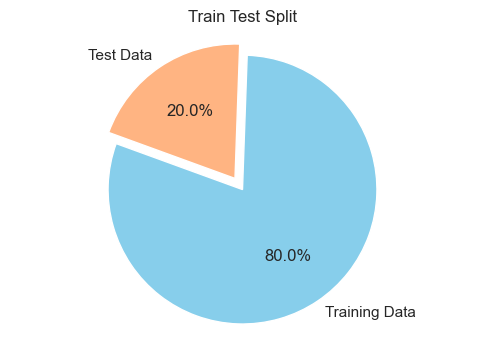

In [269]:
sizes = [X_train.shape[0], X_test.shape[0]]
labels = ['Training Data', 'Test Data']
explode = (0.1, 0)  # Explode the first slice (training data)

# Plotting
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=160, colors=['skyblue', sns.color_palette('pastel')[1]])
plt.title('Train Test Split')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Save the figure before displaying it
plt.savefig('Test_Train_Split.png')
plt.show()

### Visualizing the target column value distribution before applying SMOTE

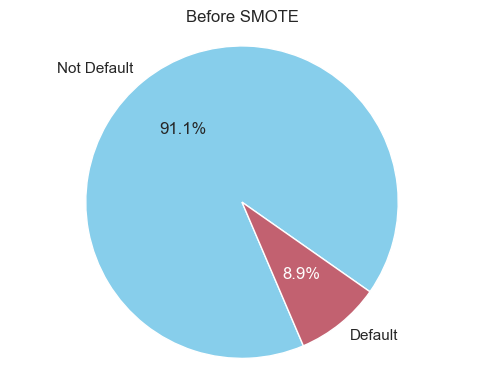

In [270]:
column_name = 'LoanStatus'

# Calculate value counts of the column
column_counts = Y_train.value_counts()

# Defining colors for each category
colors = ['skyblue', '#c26170']

# Define labels for the legend
legend_labels = ['Not Default' if idx == 0 else 'Default' for idx in column_counts.index]

# Plotting 
plt.figure(figsize=(5, 4))
patches, texts, autotexts = plt.pie(column_counts, labels=legend_labels, startangle=-35, colors=colors, autopct='%1.1f%%')
plt.title('Before SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
sns.set(style='whitegrid')  # apply seaborn style

# Set color for the percentage text
autotexts[1].set_color('white')  # 1 corresponds to the percentage text of the second slice

plt.tight_layout()
plt.savefig('before_smote.png')  # Save the figure before displaying it
plt.show()


# SMOTE

In [271]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

### Visualizing the target column value distribution after applying SMOTE

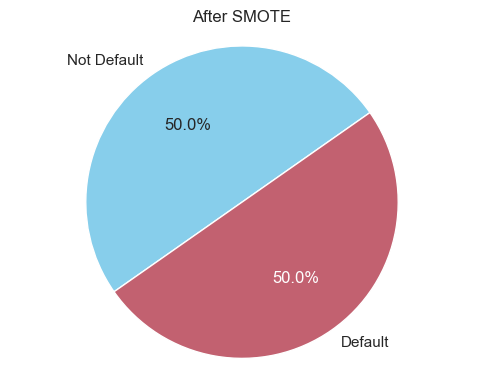

In [272]:
column_name = 'LoanStatus'

# Calculate value counts of the column
column_counts = Y_train.value_counts()

# Defining colors for each category
colors = ['skyblue', '#c26170']

# Define labels for the legend
legend_labels = ['Not Default' if idx == 0 else 'Default' for idx in column_counts.index]

# Plotting 
plt.figure(figsize=(5, 4))
patches, texts, autotexts = plt.pie(column_counts, labels=legend_labels, startangle=35, colors=colors, autopct='%1.1f%%')
plt.title('After SMOTE')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
sns.set(style='whitegrid')  # apply seaborn style

# Set color for the percentage text of the slice colored in '#b64658'
autotexts[1].set_color('white')  # 1 corresponds to the percentage text of the second slice

plt.tight_layout()
plt.savefig('after_smote.png')  # Save the figure before displaying it
plt.show()

# Decision Tree

In [273]:
from sklearn.tree import DecisionTreeClassifier
DT_classifier = DecisionTreeClassifier()

### Hyperparameter Tuning 

In [274]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth': [None, 6, 11, 15, 19],
#    'min_samples_split': [2, 3],
#    'min_samples_leaf': [1, 2, 4]}

# grid_search = GridSearchCV(DT_classifier, param_grid, cv = 5, scoring = 'accuracy')
# grid_search.fit(X_train, Y_train)

# # Access the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)

### Training the model

In [275]:
DT_classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [276]:
Y_pred = DT_classifier.predict(X_test)

In [277]:
DT_classifier.feature_importances_

array([0.03104887, 0.02632986, 0.07201486, 0.59424564, 0.00210932,
       0.0245817 , 0.18663753, 0.06303223])

#### Measuring Accuracy

In [278]:
# Training score
DT_classifier.score(X_train, Y_train)

0.9996633785089132

In [279]:
# Testing score
DT_classifier.score(X_test, Y_test)

0.9669192188667165

#### Evaluation Metrics

In [280]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.9669192188667165

In [281]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[8395  192]
 [ 118  666]]


In [282]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8587
           1       0.78      0.85      0.81       784

    accuracy                           0.97      9371
   macro avg       0.88      0.91      0.90      9371
weighted avg       0.97      0.97      0.97      9371



#### Visualizing the decision tree performance on the dataset

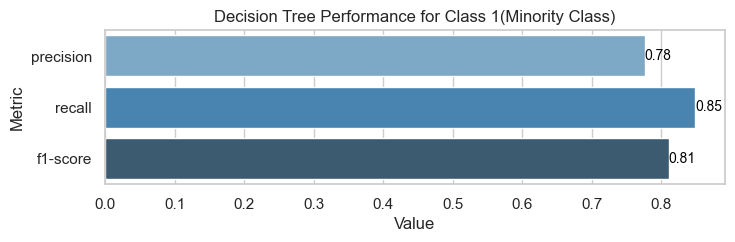

In [283]:
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Adjusted the height
barplot = sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('Decision Tree Performance for Class ' + class_label + '(Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Save the plot to a file with tight bounding box
plt.savefig('Decision_Tree_Performance.png', bbox_inches='tight')  # Added bbox_inches='tight'

# Display the plot
plt.show()

# Logistic Regression

### Feature Scaling (z-standardization) or min_max_scaler

In [284]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Defining a training logistic regression model

In [285]:
from sklearn.linear_model import LogisticRegression
logistic_rgr = LogisticRegression(random_state = 0)

In [286]:
logistic_rgr.fit(X_train_std, Y_train)

LogisticRegression(random_state=0)

### Prediction and Evaluation

In [287]:
Y_pred = logistic_rgr.predict(X_test_std)

In [288]:
# Comparing the predicted values with actual values
pd.DataFrame(data = {'Predicted Labels': Y_pred, 'Actual Labels': Y_test})

,Predicted Labels,Actual Labels
45264,1,0
49047,0,0
16034,0,0
44503,0,0
22781,1,0
...,...,...
35024,0,0
49114,0,0
42366,0,0
37837,0,0


In [289]:
#Confusion matrix
print(confusion_matrix(Y_test, Y_pred))

[[7063 1524]
 [ 134  650]]


In [290]:
# Accuracy Score
accuracy_score(Y_test, Y_pred)

0.8230711770355351

In [291]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8587
           1       0.30      0.83      0.44       784

    accuracy                           0.82      9371
   macro avg       0.64      0.83      0.67      9371
weighted avg       0.92      0.82      0.86      9371



#### Visualizing the Logistic Regression performance on the dataset

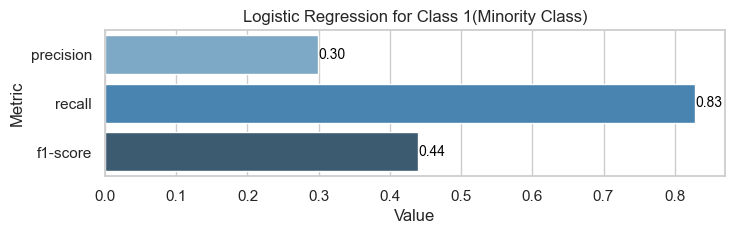

In [292]:
# Assuming Y_test and Y_pred are already defined
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Increased the height
barplot = sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('Logistic Regression for Class ' + class_label + '(Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Adjust bottom margin to prevent x-label cropping
plt.subplots_adjust(bottom=0.15)  # Increased the bottom margin

# Save the plot to a file with tight bounding box
plt.savefig('Logistic_Regression.png', bbox_inches='tight')  # Added bbox_inches='tight'

# Display the plot
plt.show()

# Random Forest

In [293]:
X_train.shape

(68326, 8)

In [294]:
# Initialize the RF classifier
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(n_estimators = 300, max_samples = 0.75)

In [295]:
# # Hyperparameter tuning
# from sklearn.model_selection import RandomizedSearchCV

# # Define the random forest classifier
# clf = RandomForestClassifier()

# # Define the grid of hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 200, 500],
#     'max_depth': [20,21],
#     'max_features': [4,5,6,7],
#     'max_samples': [0.55, 0.65, 0.75]
     
# }

# # Perform grid search with cross-validation
# rnd_search = RandomizedSearchCV(estimator=RF_classifier, param_distributions =param_grid, cv=5)
# rnd_search.fit(X_train, Y_train)

# # Print the best hyperparameters found
# print("Best hyperparameters:", rnd_search.best_params_)

# # Get the best model
# best_clf = rnd_search.best_estimator_

# # Evaluate the best model on the test set
# Y_pred = best_clf.predict(X_test)
# accuracy = accuracy_score(Y_test, Y_pred)
# print("Test set accuracy:", accuracy)

In [296]:
# Training the model
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(max_samples=0.75, n_estimators=300)

### Prediction and Evaluation

In [297]:
# Training score
RF_classifier.score(X_train, Y_train)

0.9995170213388754

In [298]:
RF_classifier.score(X_test, Y_test)

0.9766300288122932

In [299]:
# Prediction on the test set
Y_pred = RF_classifier.predict(X_test)

In [300]:
# Comparing the predicted values with actual values
pd.DataFrame(data = {'Predicted Labels': Y_pred, 'Actual Labels': Y_test})

,Predicted Labels,Actual Labels
45264,0,0
49047,0,0
16034,0,0
44503,0,0
22781,0,0
...,...,...
35024,0,0
49114,0,0
42366,0,0
37837,0,0


In [301]:
# Accuracy Score
accuracy_score(Y_test, Y_pred)

0.9766300288122932

In [302]:
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

[[8452  135]
 [  84  700]]


In [303]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8587
           1       0.84      0.89      0.86       784

    accuracy                           0.98      9371
   macro avg       0.91      0.94      0.93      9371
weighted avg       0.98      0.98      0.98      9371



#### Visualizing the Random Forest performance on the dataset

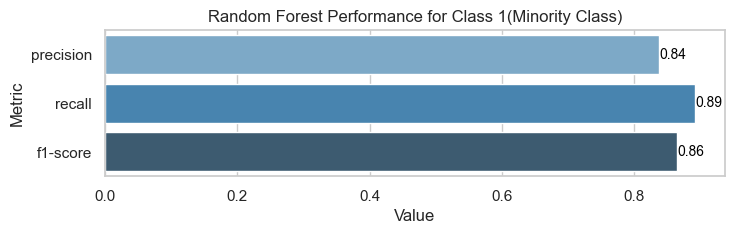

In [304]:
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Adjusted the height
barplot = sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('Random Forest Performance for Class ' + class_label + '(Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Adjust bottom margin to prevent x-label cropping
plt.subplots_adjust(bottom=0.15)  # Increase the bottom margin as needed

# Save the plot to a file with tight bounding box
plt.savefig('Random_Forest_Performance.png', bbox_inches='tight')  # Added bbox_inches='tight'

# Display the plot
plt.show()

# Support Vector Machine (SVM)

### Feature Scaling (z-standardization) or min_max_scaler

In [305]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Defining a training SVM model

In [306]:
# Initialize the classifier
from sklearn.svm import SVC
SVM_classifier = SVC(kernel = 'linear')

In [307]:
# Training the model
SVM_classifier.fit(X_train_std, Y_train)

SVC(kernel='linear')

### Evaluation and Prediction

In [308]:
# Making prediction with the test data
Y_pred = SVM_classifier.predict(X_test_std)

In [309]:
# Comparing the predicted values with actual values
pd.DataFrame(data = {'Predicted Labels': Y_pred, 'Actual Labels': Y_test})

,Predicted Labels,Actual Labels
45264,1,0
49047,0,0
16034,0,0
44503,0,0
22781,1,0
...,...,...
35024,0,0
49114,0,0
42366,0,0
37837,0,0


In [310]:
# Accuracy Score
accuracy_score(Y_test, Y_pred)

0.8230711770355351

In [311]:
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

[[7057 1530]
 [ 128  656]]


In [312]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8587
           1       0.30      0.84      0.44       784

    accuracy                           0.82      9371
   macro avg       0.64      0.83      0.67      9371
weighted avg       0.93      0.82      0.86      9371



#### Visualizing the SVM performance on the dataset

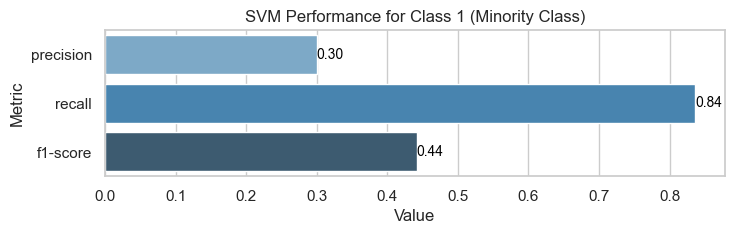

In [313]:
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Adjusted the height
sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('SVM Performance for Class ' + class_label + ' (Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Adjust bottom margin to prevent x-label cropping
plt.subplots_adjust(bottom=0.15)  # Increase the bottom margin as needed

# Save the plot to a file with tight bounding box
plt.savefig('SVM_Performance.png', bbox_inches='tight')  # Added bbox_inches='tight'

# Display the plot
plt.show()

# K Nearest Neighbor (KNN)

### Feature Scaling (z-standardization) or min_max_scaler

In [338]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Defining a training KNN model

In [454]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 40)

In [455]:
KNN_classifier.fit(X_train_std, Y_train)

KNeighborsClassifier(n_neighbors=40)

### Prediction and Evaluation

In [456]:
# Prediction in the test data
Y_pred = KNN_classifier.predict(X_test_std)

In [457]:
# Comparing the predicted values with actual values
pd.DataFrame(data = {'Predicted Labels': Y_pred, 'Actual Labels': Y_test})

,Predicted Labels,Actual Labels
45264,0,0
49047,0,0
16034,0,0
44503,0,0
22781,0,0
...,...,...
35024,0,0
49114,0,0
42366,0,0
37837,0,0


In [458]:
# Accuracy Score
accuracy_score(Y_test, Y_pred)

0.9343719987194536

In [459]:
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

[[8102  485]
 [ 130  654]]


In [460]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8587
           1       0.57      0.83      0.68       784

    accuracy                           0.93      9371
   macro avg       0.78      0.89      0.82      9371
weighted avg       0.95      0.93      0.94      9371



#### Visualizing the KNN performance on the dataset

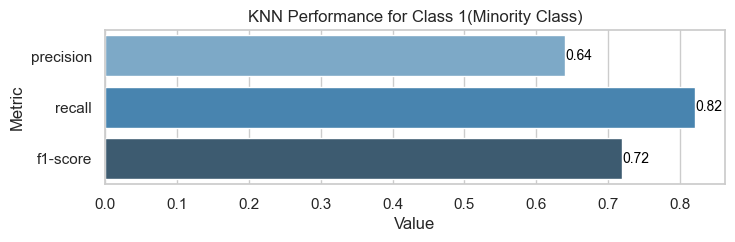

In [446]:
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Adjusted the height
barplot = sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('KNN Performance for Class ' + class_label + '(Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Save the plot to a file with tight bounding box
plt.savefig('KNN_Performance.png', bbox_inches='tight')

# Display the plot
plt.show()

# Naive Bayes Classification

### Defining a training Bayesian model

In [323]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [324]:
classifier.fit(X_train, Y_train)

GaussianNB()

### Prediction and Evaluation

In [325]:
# Making prediction with the test data
Y_pred = classifier.predict(X_test)

In [326]:
# Comparing the predicted values with actual values
pd.DataFrame(data = {'Predicted Labels': Y_pred, 'Actual Labels': Y_test})

,Predicted Labels,Actual Labels
45264,1,0
49047,0,0
16034,1,0
44503,0,0
22781,1,0
...,...,...
35024,1,0
49114,1,0
42366,1,0
37837,1,0


In [327]:
# Accuracy Score
accuracy_score(Y_test, Y_pred)

0.33817095293992105

In [328]:
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

[[2410 6177]
 [  25  759]]


In [329]:
# Classification Report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.28      0.44      8587
           1       0.11      0.97      0.20       784

    accuracy                           0.34      9371
   macro avg       0.55      0.62      0.32      9371
weighted avg       0.92      0.34      0.42      9371



#### Visualizing the Bayesian performance on the dataset

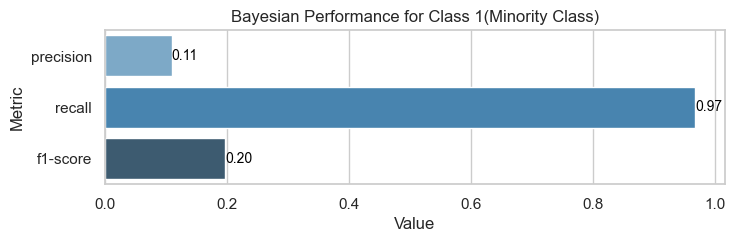

In [330]:
report = classification_report(Y_test, Y_pred, output_dict=True)

class_label = '1'
metrics = ['precision', 'recall', 'f1-score']
values = np.array([report[class_label][metric] for metric in metrics], dtype=np.float32)

plt.figure(figsize=(8, 2))  # Adjusted the height
barplot = sns.barplot(x=values, y=metrics, hue=metrics, palette='Blues_d')
plt.title('Bayesian Performance for Class ' + class_label + '(Minority Class)')
plt.xlabel('Value')
plt.ylabel('Metric')

# Annotate bars with their respective values
for index, value in enumerate(values):
    barplot.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

# Save the plot to a file with tight bounding box
plt.savefig('Bayesian_Performance.png', bbox_inches='tight')

# Display the plot
plt.show()

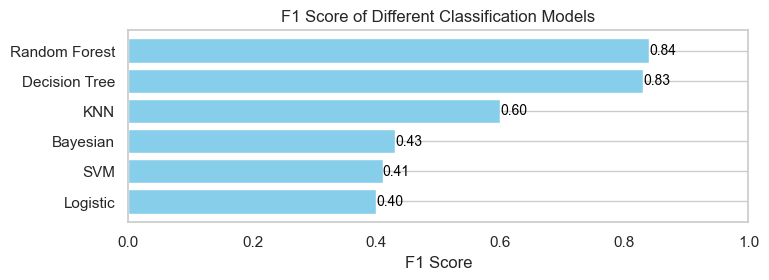

In [331]:
models = ['Logistic', 'SVM', 'Bayesian', 'KNN', 'Decision Tree', 'Random Forest']
f1_scores = [0.40, 0.41, 0.43, 0.60, 0.83, 0.84]

# Create horizontal bar plot
plt.figure(figsize=(8, 2.5))  # Adjusted the height
bars = plt.barh(models, f1_scores, color='skyblue')
plt.xlabel('F1 Score')
plt.title('F1 Score of Different Classification Models')
plt.xlim(0, 1)  # Limit the x-axis from 0 to 1
plt.grid(axis='x', alpha=0.7)  # Add grid lines

# Annotate bars with their respective values
for bar, score in zip(bars, f1_scores):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
             ha='left', va='center', fontsize=10, color='black')

# Remove vertical grid lines
plt.grid(axis='x', alpha=0)  # Remove vertical grid lines

# Save the plot to an image file
plt.savefig('classification_models_f1_scores.png', bbox_inches='tight')  # Save the plot as PNG

# Display the plot
plt.show()

# Validation

In [332]:
# Creating dummy data
X_temp, X_dummy, Y_temp, Y_dummy = train_test_split(X, Y, test_size = 0.0002, random_state = 4)

In [333]:
X_dummy.shape

(10, 8)

In [334]:
# Activating the selected model ie. Random Forest
RF_classifier = RandomForestClassifier(n_estimators = 70, min_samples_split = 5, min_samples_leaf = 1, oob_score = True)

In [335]:
# Fitting training data in the model
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=70, oob_score=True)

In [336]:
# Prediction in the test data
Y_validate = RF_classifier.predict(X_dummy)

In [337]:
print(Y_validate)

[0 1 0 1 0 1 0 0 0 1]
